In [1]:
import math as m
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

$$
m \frac{d^2 \vec r}{dt^2} = -mg \hat j - \gamma \vec v
$$

simplificando

$$
\ddot x = - \gamma v_x \\
\ddot y = -g - \gamma v_y
$$

Escrito como sistema de ecuaciones:

$$
\dot x = v_x \\
\dot v_x = - \gamma v_x \\
\dot y = v_y \\
\dot v_y = -g  - \gamma v_y
$$


In [10]:
def caida_libre(t , x_v , g=9.81 , gam = 0):
    # x_v = [x,y,vx,vy]
    dx = x_v[2]
    dy = x_v[3]
    dvx = -gam*x_v[2]
    dvy = -g -gam*x_v[3]
    return np.array([dx,dy,dvx,dvy])

def suelo(t,x_v, g=9.81 , gam = 0):
    return x_v[1]

In [44]:
tf = 1
ci = [0.0,0.0,0.2,4.0]
x_v = sp.solve_ivp(caida_libre,(0,tf),ci,dense_output=True,events=suelo)
t_reb = x_v.t_events[0][-1]
t = np.linspace(0,t_reb)
x,y,vx,vy = x_v.sol(t)
n_ci = x_v.sol(t_reb)
n_ci[3] = -n_ci[3]
x_v = sp.solve_ivp(caida_libre,(0,1.1*t_reb),n_ci,dense_output=True,events=suelo)
t_reb = x_v.t_events[0][-1]
t = np.linspace(0,t_reb)
x2,y2,vx2,vy2 = x_v.sol(t)
n_ci = x_v.sol(t_reb)
n_ci[3] = -n_ci[3]
x_tot , y_tot = np.concatenate((x,x2)) , np.concatenate((y,y2))

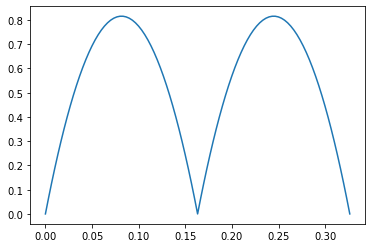

In [45]:
plt.plot(x_tot,y_tot)
plt.show()

In [48]:
def caida_con_rebote(ci , t_final , g=9.81 , gam = 0, reb_tot=10):
    x , y , reb = np.array([]) , np.array([]) , 0 
    while reb < reb_tot:
        x_v = sp.solve_ivp(caida_libre,(0,t_final),ci,dense_output=True,events=suelo)
        t_reb = x_v.t_events[0][-1]
        t = np.linspace(0,t_reb)
        x_n , y_n , vx_n , vy_n = x_v.sol(t)
        x , y  = np.concatenate((x,x_n)) , np.concatenate((y,y_n)) 
        n_ci = x_v.sol(t_reb)
        n_ci[3] = -n_ci[3]
        t_final , ci = 2.1*t_reb , n_ci
        reb += 1
    return x , y

In [49]:
x , y = caida_con_rebote(ci,tf)

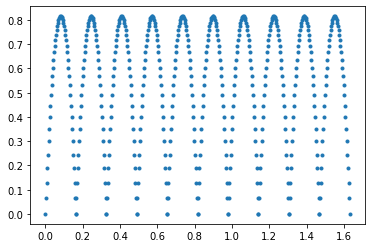

In [51]:
plt.plot(x,y,'.')
plt.show()